# Plot Difference

In [1]:
from scipy.io import wavfile
import numpy as np
from pylab import plot, show, figure, imshow
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4) # set plot sizes to something larger than default
plt.style.use('ggplot') # use a nice plotting style

In [2]:
from pathlib import Path

FS = 48000  # sampling rate
PREDICTED_AUDIO = '../audio/pred-gcn-gru-tfilm-41-20231201-132556-48k.wav'
TARGET_AUDIO = '../audio/targ-gcn-gru-tfilm-41-20231201-132556-48k.wav'

In [3]:
output = wavfile.read(PREDICTED_AUDIO)[1]

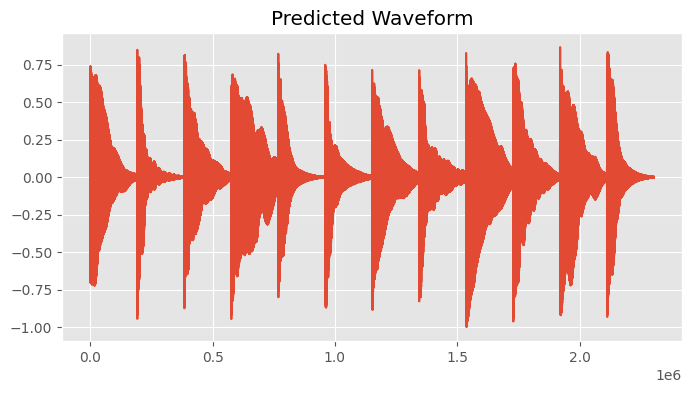

In [4]:
plot(output)
plt.title('Predicted Waveform')
show()

In [5]:
target = wavfile.read(TARGET_AUDIO)[1]

sample_rate = FS
N = 512
hop_size = 256
window = np.hanning(N)

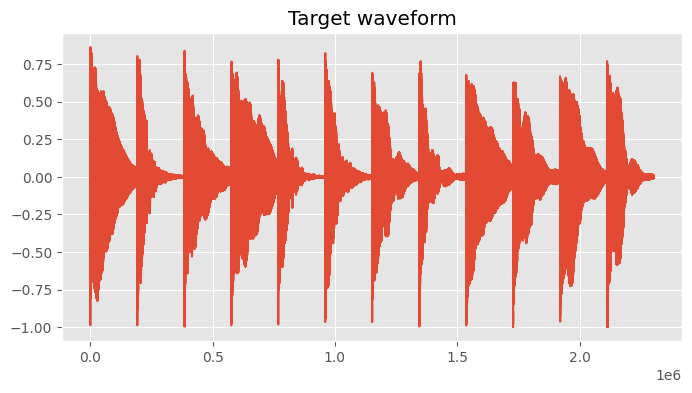

In [6]:
plot(target)

plt.title('Target waveform')
show()

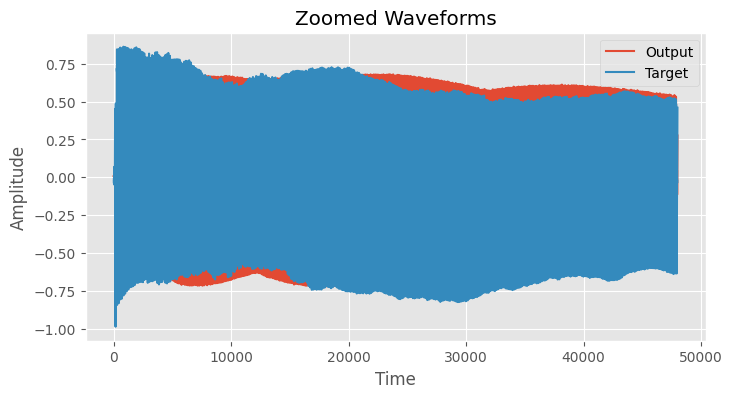

In [7]:
start = 1  # start of the zoom
end = 48000  # end of the zoom

# make sure your waveforms are numpy arrays
output_zoom = output[start:end]
target_zoom = target[start:end]

# create time vector
time = range(start, end)

plt.figure()
plt.plot(time, output_zoom, label='Output')
plt.plot(time, target_zoom, label='Target')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Zoomed Waveforms')
plt.legend()
plt.grid(True)
plt.show()

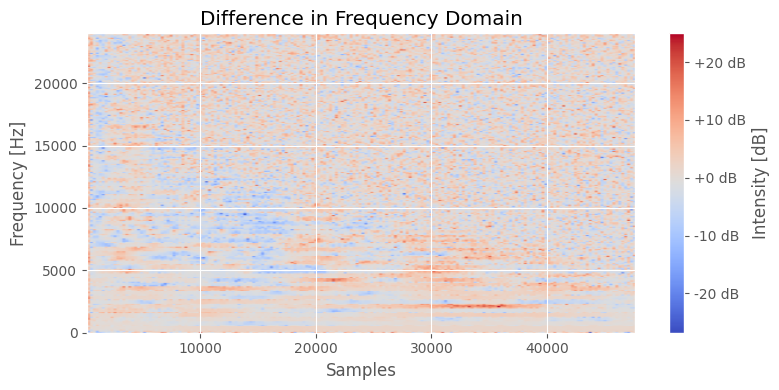

In [8]:
o = output_zoom
t = target_zoom

max_len = max(len(o), len(t))
o = np.pad(o, (0, max_len - len(o)))
t = np.pad(t, (0, max_len - len(t)))

# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _= plt.specgram(o, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(t, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
plt.close()

# Convert time values to sample values considering the 'start' index
t_o_samples = t_1 * sample_rate + start  # Here's the modification
t_t_samples = t_2 * sample_rate + start  # This should give you the absolute index in terms of the original signal

# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)  # Convert to dB and then subtract

# 3. Plot the difference
fig, ax = plt.subplots()
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o_samples[0], t_o_samples[-1], freqs_1[0], freqs_1[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Samples')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

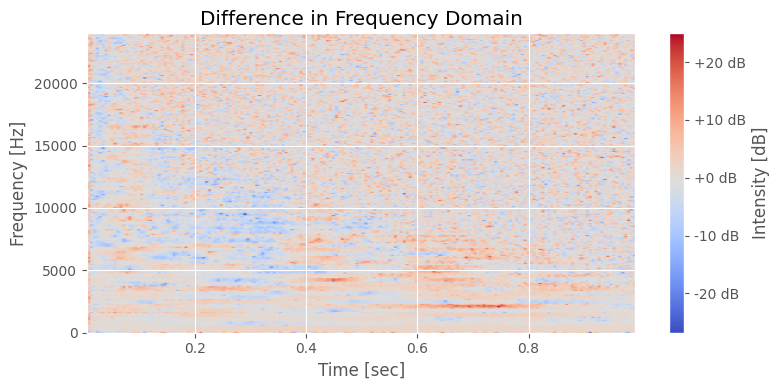

In [9]:
o = output_zoom
t = target_zoom

max_len = max(len(o), len(t))
o = np.pad(o, (0, max_len - len(o)))
t = np.pad(t, (0, max_len - len(t)))


# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _= plt.specgram(o, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(t, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
plt.close()
# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)  # Convert to dB and then subtract

# difference = Pxx_o - Pxx_t

# 3. Plot the difference
fig, ax = plt.subplots()
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_1[0], t_1[-1], freqs_1[0], freqs_1[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

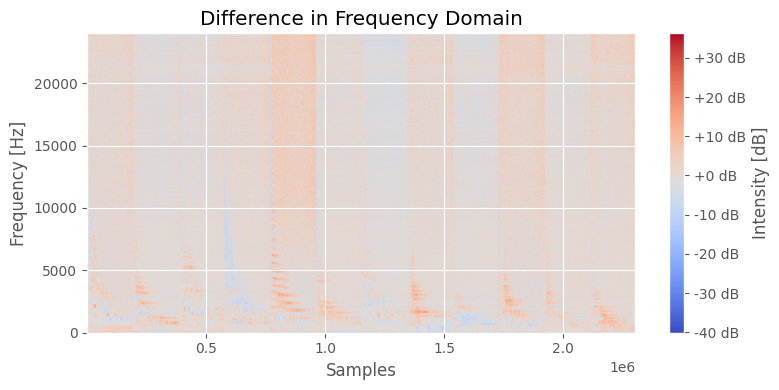

In [10]:
# Load both audio files
y1 = wavfile.read(PREDICTED_AUDIO)[1]

y2 = wavfile.read(TARGET_AUDIO)[1]

# Setting sample rate and STFT parameters
sample_rate = FS
n_fft_value = 512
hop_length_value = 256  # Adjust as needed for time resolution

# Ensure both audios have the same length
if len(y1) > len(y2):
    y1 = y1[:len(y2)]
else:
    y2 = y2[:len(y1)]

# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _ = plt.specgram(y1, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(y2, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
plt.close()

# Convert time values to sample values
t_o_samples = (t_1 * sample_rate).astype(int)
t_t_samples = (t_2 * sample_rate).astype(int)

# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)  # Convert to dB and then subtract

# 3. Plot the difference
fig, ax = plt.subplots()
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o_samples[0], t_o_samples[-1], freqs_1[0], freqs_1[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Samples')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()


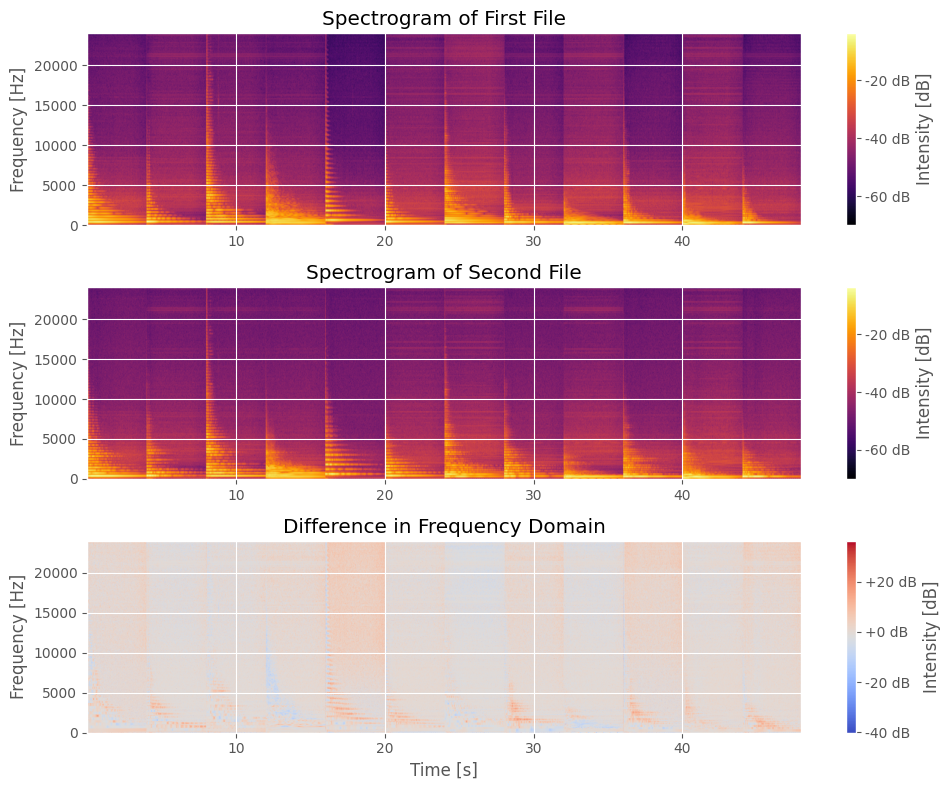

In [11]:
# Setting sample rate and STFT parameters
sample_rate = FS
n_fft_value = 512
hop_length_value = 256  # Adjust as needed for time resolution

# Ensure both audios have the same length
if len(y1) > len(y2):
    y1 = y1[:len(y2)]
else:
    y2 = y2[:len(y1)]

# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _ = plt.specgram(y1, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(y2, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
plt.close()

# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)

# 3. Plot the spectrograms
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# First audio file
img1 = axs[0].imshow(10 * np.log10(Pxx_1 + 1e-7), aspect='auto', origin='lower', cmap='inferno', extent=[t_1[0], t_1[-1], freqs_1[0], freqs_1[-1]])
axs[0].set_title("Spectrogram of First File")
axs[0].set_ylabel('Frequency [Hz]')
axs[0].grid(True)
cbar1 = fig.colorbar(img1, ax=axs[0], format="%+2.0f dB")
cbar1.set_label('Intensity [dB]')

# Second audio file
img2 = axs[1].imshow(10 * np.log10(Pxx_2 + 1e-7), aspect='auto', origin='lower', cmap='inferno', extent=[t_2[0], t_2[-1], freqs_2[0], freqs_2[-1]])
axs[1].set_title("Spectrogram of Second File")
axs[1].set_ylabel('Frequency [Hz]')
axs[1].grid(True)
cbar2 = fig.colorbar(img2, ax=axs[1], format="%+2.0f dB")
cbar2.set_label('Intensity [dB]')

# Difference
img3 = axs[2].imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_1[0], t_1[-1], freqs_1[0], freqs_1[-1]])
axs[2].set_title("Difference in Frequency Domain")
axs[2].set_ylabel('Frequency [Hz]')
axs[2].set_xlabel('Time [s]')
axs[2].grid(True)
cbar3 = fig.colorbar(img3, ax=axs[2], format="%+2.0f dB")
cbar3.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

In [12]:
def nth_octave_smoothing(spectrum, n: int = 3):
    N = len(spectrum)
    freq_bins = np.linspace(0, int(sample_rate/2), N)
    y = np.zeros(shape=np.shape(spectrum), dtype = type(spectrum[0]))
    M_1 = len(spectrum) - 1

    for k in range(len(spectrum)):
        a = int(np.round(k * 2 ** (-1 /(2 * n))))
        b = int(np.round(k * 2 ** (1 /(2 * n))))

        if a == b:
            b += 1

        if b > M_1:
            b = M_1

        y[k] = (1 / ((b-1) - a + 1)) * np.sum(spectrum[a:b])
    return y, freq_bins

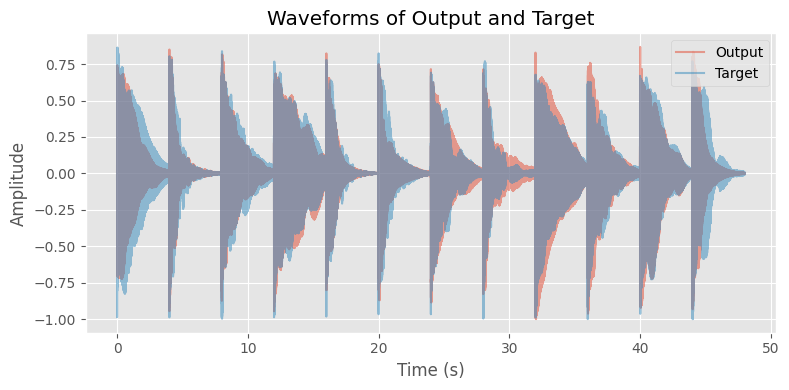

In [13]:
# Plot waveforms
plt.figure()

# Create time axis
time = [i/FS for i in range(len(y1))]

# Display the waveforms
plt.plot(time, y1, alpha=0.5, label='Output')
plt.plot(time, y2, alpha=0.5, label='Target')

# Zooming into a specific part (e.g., the first 0.1 seconds)
# start, end = 3.6, 4.0
# plt.xlim([start, end])
# plt.ylim([-0.5, 0.5])

# Adding legend and labels
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveforms of Output and Target')
plt.grid(True)
plt.tight_layout()
plt.show()

Frequency of bin $i$:

\begin{equation}
    f(i) = \frac{i * SR} {2 * N (bins)} 
\end{equation}

In [14]:
def nth_octave_smoothing(spectrum, n: int = 3):
    N = len(spectrum)
    freq_bins = np.linspace(0, int(sample_rate/2), N)
    y = np.zeros(shape=np.shape(spectrum), dtype = type(spectrum[0]))
    M_1 = len(spectrum) - 1

    for k in range(len(spectrum)):
        a = int(np.round(k * 2 ** (-1 /(2 * n))))
        b = int(np.round(k * 2 ** (1 /(2 * n))))

        if a == b:
            b += 1

        if b > M_1:
            b = M_1

        y[k] = (1 / ((b-1) - a + 1)) * np.sum(spectrum[a:b])
    return y, freq_bins

In [15]:
sample_rate = FS
FRAME = int(2 ** 10)